<a href="https://colab.research.google.com/github/kheit9527/2025_TCFST_Python_ML/blob/main/250630_Python_ML_Class01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```python
文字編輯功能：Markdown語法(加表格、超連結)
缺點：直接輸入時，要留一個空行才是真的換行
```
aaaa
bbbb

cccc


```
LaTeX Math語法
```
$ \frac{1}{x^2} \pi $


```
AI -> 數據科學：發掘數據後面的故事
房屋實價預測 -> 可能的誤差(土地面積遠大於建物面積) -> 修改模型
```



```
1. 收集數據
    分成兩部分: a.訓練數據(給模型看) b.測試數據(不給模型看)

2. 定義數據的輸入(x)/輸出(y)
    e.g. 輸入: 坪數/樓層/是否有公設  輸出: 價格

3. 根據輸出的類型, 選擇你需要的演算法
    a. 固定幾種的輸出: 分類問題(classification), e.g.圖片是貓/狗/狐狸?
    b. 數值類型的輸出: 回歸問題(regression), e.g. 預測房價

4. 把你的"訓練數據"餵給你的演算法, 訓練出"模型"

5. 用你的測試數據,對你的模型進行分析(做驗證)
```



```
Machine Learning(ML, 機器學習):
scikit-learn簡稱sklearn: (舊時代)統計學方法
scipy: 冷門一點點的統計學方法, 統計學方面的計算
matplotlib: 畫圖函式庫

如果要使用到colab沒有幫你裝的函式庫:
!pip install schedule (!代表命令列的命令)
```



In [237]:
# !pip install schedule

```
分類問題: y固定數種的
問題1. 數據是否足夠???
(考慮: 問題到底需要多少數據? 問題簡單:數據少 問題難:數據多)
    a. 機器學習數據量: 幾千~幾萬 筆
    b. 深度學習數據量: 幾萬~幾十萬 筆以上

在分類問題中, 越多種y就代表問題越難
!!! 越難的問題, 欄位個數也應該比較多!
無人商店??? -> 開發成本太高
準確率不要放第一位, User Experience才重要!


問題2.
```

In [238]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
# pandas資料型態: 1. DataFrame(2d表格) 2. Series(1d列/行)
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df["y"] = iris["target"]
# df.to_csv("iris.csv", encoding="utf-8", index=False)
df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [239]:
# load_iris()

In [240]:
from sklearn.model_selection import train_test_split
train_test_split([1, 2, 3, 4],
                 [5, 6, 7, 8],
                 test_size=0.25)
# 資料少: 90%訓練, 10%驗證 ; 資料多: 80%訓練, 20%驗證
# 多個list時: 會保留相對位置

[[4, 1, 2], [3], [8, 5, 6], [7]]

```
CSV: comma-separated values
sl,sw,pl,pw
4.2,4.3,4.4,4.5

如果內容有逗號:
content,name
"今天,天氣很好",XXX
```



```
# pandas drop test
test = pd.DataFrame([
    [1, 2],
    [3, 4]
], columns=["a", "b"], index=["a", "b"])
test.drop("a", axis=1)

```



In [241]:
from sklearn.model_selection import train_test_split

# 第0招: 直接給予每一行名稱(複製貼上)
# x = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
#        'petal width (cm)']]

# 先把x(輸入)和y(輸出)分出來
# 第1招: 拿到最後一個欄位的前面
# x_cols = df.columns[:-1]
# x = df[x_cols]

# 第2招: drop掉y(記得axis參數: 0<列>/1<行>兩種方向)
x = df.drop(["y"], axis = 1)
y = df["y"]

# 90%x / 10%x, 90%y / 10%y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)


In [242]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 2) # max_depth = 3
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'petal width (cm) <= 0.8\ngini = 0.667\nsamples = 135\nvalue = [46, 44, 45]\nclass = setosa'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 46\nvalue = [46, 0, 0]\nclass = setosa'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 89\nvalue = [0, 44, 45]\nclass = virginica'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.122\nsamples = 46\nvalue = [0, 43, 3]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.045\nsamples = 43\nvalue = [0, 1, 42]\nclass = virginica')]

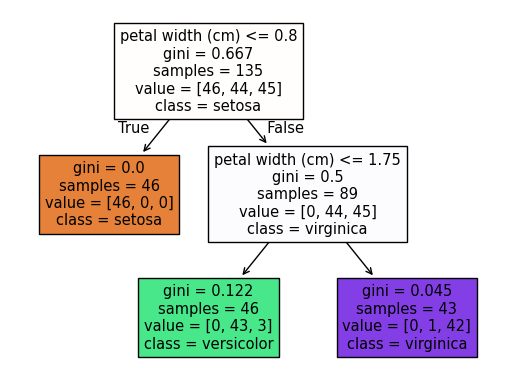

In [243]:
from sklearn.tree import plot_tree
plot_tree(clf,
          feature_names = iris["feature_names"],
          class_names = iris["target_names"],
          filled = True)

```
gini係數: 衡量問完問題之後、照著分佈猜, 猜錯機率的變化(平均猜錯機率, 希望他趨近於0)

機率: p1(1-p1)+p2(1-p2), 不要寫 p1(p2)+p2(p1)
    多種: 會變成p1(p2+p3)+p2(p1+p3)+p3(p1+p2)
    <不要這樣寫>

統計學: 給你的資料, 你不能全吃
     (放下太稀少、例外的資料)

防止過度訓練: 每一個演算法都要考慮
過度訓練(過擬合) : 每一個演算法都要避免

決策樹避免過擬合: 避免長到最底
1. 前剪枝: 透過預先的參數設置來阻止(很省時間，但不夠精確，通常會選用) -> max_depth
2. 後剪枝: 如果這個問題的gini係數減少很微量，就不問(精確但花時間，較少使用) -> min_impurity_decrease
```

In [248]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score
pre = clf.predict(x_test)
print(pre)
print(accuracy_score(pre, y_test))
print(balanced_accuracy_score(pre, y_test))
print(f1_score(pre, y_test, average='macro'))

[1 2 1 1 0 1 1 0 2 1 1 2 1 0 0]
0.8666666666666667
0.9166666666666666
0.8690476190476191


$ Gini = \sum {p_i}{(1-pi)} $

```
gini: 平均猜錯機率
決策樹的每個問題都是: 掃過所有欄位, 所有的分割點,

優點: 可解釋性!!!
```

In [ ]:
# 課後測試
# from sklearn import tree
# import matplotlib.pyplot as plt
# plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
# tree.plot_tree(clf, max_depth = 10,
#                feature_names = iris["feature_names"],
#                class_names = iris["target_names"],
#                filled = True,
#                fontsize = 10)
# plt.show()